# <타깃 마케팅>
## 온라인 판매 데이터 분석
## 타깃 마케팅이 필요한 소비자 군집 구성
## 정답이 없는 비지도 학습을 통해 어떤 군집을 이룰 수 있는지 확인해 보기
## UCI Machine Learning Repository 에서 다운로드

In [125]:
# 비지도 학습
# - 타깃이 주어지지 않은 상태에서 학습
# - 훈련 데이터를 학습 -> 모델 생성 -> 유사한 특성(관계/패턴)을 가지는 데이터로 클러스터를 구성
# - 새로운 데이터의 특성을 분석하여 해당 클러스터 예측

In [126]:
# k-평균
# 유클리디안 거리 알고리즘을 이용 --> 평균 거리가 작은 쪽으로 계속 중심점을 이동

In [127]:
# 엘보방법
#  - 왜곡 : 클러스터의 중심점과 클러스터 내의 데이터 거리 차이의 제곱값의 합
#           각각의 거리를 제곱한 것들의 합
#  - 클러스터의 개수 k의 변화에 따른 왜곡의 변화를 그래프로 나타내 보면 그래프가 꺾이는 지점이
#    엘보...그 곳을 최적의 k로 선택하면 됨

In [128]:
# 실루엣 분석 도구
#  - 클러스터 내의 데이터가 얼마나 조밀하게 모여있는지 측정하는 그래프 도구
#  - 데이터 i가 해당 클러스터 내의 데이터와 얼마나 가까운가를 나타내는 응집력 a(i)
#  - 가장 가까운 다른 클러스터 내의 데이터와 얼마나 떨어져 있는가를 나타내는 클러스터 분리도 b(i)를 이용
#  - 실루엣 계수 s(i)를 계산
#  - (-1)에서 (1) 이상의 값을 가지며 1에 가까울수록 좋은 군집화
#  - 실루엣 계수 공식 : s(i) = (b(i) - a(i)) / max(a(i), b(i))

In [129]:
# https://archive.ics.uci.edu/ml/datasets/online+retail
# Data Folder > Online Retail.xlsx

# ================================================

In [131]:
# 각 컬럼에 대한 정보 (by Online Retail.xlsx)

# nvoiceNo: 6자리 정수로 이루어진 송장 번호. ‘C’로 시작하는 것은 취소 주문 
# StockCode: 제품 고유의 품목 코드 
# Description: 제품 설명 
# Quantity: 주문 수량
# Country: 주문 고객의 국적
# InvoiceDate: 주문 날짜와 시간 
# UnitPrice: 제품 단가(£, 영국 파운드화)
# CustomerID: 주문 고객 번호

In [61]:
import pandas as pd
import math

# 데이터 준비 및 탐색

In [62]:
retail_df = pd.read_excel(r'C:\Users\pc\_MachineLearning\Online Retail.xlsx')
retail_df.head()
# CustomerID --> 고객번호는 정수형태여야 함 (학번과도 같음 실수형태는 불가함)
# 데이터를 판단할 때 객관적인 사실을 파악하는 것이 중요

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [63]:
retail_df.shape

(541909, 8)

In [64]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# 데이터 정제하기 - 데이터 확인 (오류 등)

In [65]:
# 1. CustomerID의 값이 null이 아닌 값 추출하기
# retail_df['CustomerID'].notnull()
retail_df = retail_df[retail_df['CustomerID'].notna()] # 널이 아닌 값 제거 (자기 자신으로 치환)

In [66]:
sum(retail_df['Quantity'] < 0)

8905

In [67]:
retail_df = retail_df[retail_df['Quantity'] > 0] # Quantity가 양수인 값만 추출

In [68]:
sum(retail_df['UnitPrice'].isna()) # 확인

0

In [69]:
sum(retail_df['Quantity'] < 0) # 확인

0

In [70]:
sum(retail_df['CustomerID'].isna()) # 확인

0

In [71]:
# CustomerID --> 정수 형태로 변환 / DataFrame.astype(int)
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)

In [72]:
retail_df.info() # 모든 데이터가 널값이 없음을 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  int32         
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 25.8+ MB


In [73]:
retail_df.head() # CunstomerID가 정상적으로 정수형태로 변환된 것을 알 수 있음
# 고객 한 명이 여러 번에 걸쳐 가격이 각기 다른 상품을 주문한 데이터임을 알 수 있음

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [74]:
# CustomerID, Invoice, StockCode 별로 그룹화 하기 (중복된 데이터가 있는지 확인)
# retail_df.groupby(['CustomerID', 'InvoiceNo', 'StockCode']).count()

list(retail_df.columns)
# [retail_df.groupby([retail_df.columns]).count() > 1 for i in retail_df]
# retail_df.groupby(retail_df.columns > 1).count() *************

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

In [75]:
# 중복 레코드 제거
# 변경 값을 저장할 것인지의 여부 : inplace = False (저장 안 함). inplace = True (저장함).
print(retail_df.shape)
retail_df.drop_duplicates(inplace=True)
print(retail_df.shape)

(397924, 8)
(392732, 8)


In [76]:
# 제품의 수(Product), 거래 수(Transaction), 고객 수(Cunstomer), 고객의 국적(Country)
retail_df['StockCode'].value_counts() # .value_counts() : 빈도수 구하기
retail_df['InvoiceNo'].value_counts()
retail_df['CustomerID'].value_counts()

# 새로운 데이터프레임 생성하기
pd.DataFrame({
    'Product' : [len(retail_df['StockCode'].value_counts())],
    'Transaction' : [len(retail_df['InvoiceNo'].value_counts())],
    'Customer' : [len(retail_df['CustomerID'].value_counts())]
})

,Product,Transaction,Customer
0,3665,18536,4339


In [77]:
# 제품의 수(Product), 거래 수(Transaction), 고객 수(Cunstomer), 고객의 국적(Country)
# retail_df['StockCode'].value_counts() # .value_counts() : 빈도수 구하기
# retail_df['InvoiceNo'].value_counts()
# retail_df['CustomerID'].value_counts()

# # 새로운 데이터프레임 생성하기
# pd.DataFrame({
#     'Product' : [len(retail_df['StockCode'].value_counts())],
#     'Transaction' : [len(retail_df['InvoiceNo'].value_counts())],
#     'Customer' : [len(retail_df['CustomerID'].value_counts())]
# })
# 변수 넣어 해보기

In [78]:
retail_df['Country'].value_counts() # 국가별 데이터 확인

United Kingdom          349227
Germany                   9027
France                    8327
EIRE                      7228
Spain                     2480
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1453
Australia                 1184
Norway                    1072
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45
Lithuani

# 분석용 데이터 생성

In [79]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [80]:
# 주문 금액 열 추가 'SaleAmount'
# - 단위당 가격과 수량이 있는 경우 총 주문 금액 column을 추가해 주는 것이 좋음
retail_df['SaleAmount'] = retail_df['UnitPrice'] * retail_df['Quantity']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SaleAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


# 마케팅에 이용하려면?
### 단, 고객이 실제 원하는 것과는 다를 수 있을 가능성 존재

In [81]:
# # 고객의 주문 횟수, 주문 총액, 주문 후 지난 일수 (주문 후 며칠이 지났는지)
# retail_df.groupby('CustomerID')['InvoiceNo'].count() # CustermerID 당 주문 횟수
# retail_df.groupby('CustomerID')['SaleAmount'].sum() # CustermerID 당 총 주문 금액
customer_df = retail_df.groupby('CustomerID').agg({
    'InvoiceNo' : 'count', # 총 주문 횟수
    'SaleAmount' : 'sum', # 총 주문 금액
    'InvoiceDate' : 'max' # 가장 최근 날짜 출력
}) # 함수 또한 문자열('')로 적어주어야 함

customer_df = customer_df.reset_index()
customer_df.head()

,CustomerID,InvoiceNo,SaleAmount,InvoiceDate
0,12346,1,77183.60,2011-01-18 10:01:00
1,12347,182,4310.00,2011-12-07 15:52:00
2,12348,31,1797.24,2011-09-25 13:13:00
3,12349,73,1757.55,2011-11-21 09:51:00
4,12350,17,334.40,2011-02-02 16:01:00


In [82]:
# InvoiceNo, InvoiceData 컬럼명 적절히 바꿔주기
# customer_df.columns = ['CustomerID', 'Freq', 'SaleAmount', 'ElapsedDays'] --> 일일이 바꿔주어야 함
customer_df = customer_df.rename(columns={
    'InvoiceNo' : 'Freq',
    'InvoiceDate' : 'ElapsedDays'
})
customer_df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346,1,77183.60,2011-01-18 10:01:00
1,12347,182,4310.00,2011-12-07 15:52:00
2,12348,31,1797.24,2011-09-25 13:13:00
3,12349,73,1757.55,2011-11-21 09:51:00
4,12350,17,334.40,2011-02-02 16:01:00


In [83]:
# 마지막 주문일로부터 며칠이 지났는지에 대한 값을 ElapsedDays에 저장하기
import datetime
datetime.datetime.today() # 현재 날짜
datetime.datetime.today().year # 현재 연도

2022

In [84]:
# 임의 기준 날짜 : 2011. 12. 31
# - 임의로 설정한 기준 날짜 - 주문 날짜
customer_df['ElapsedDays'] = datetime.datetime(2011,12,31) - customer_df['ElapsedDays']
customer_df.head()

# 346 days 13:59:00 <-- 숫자, 문자가 함께 나오므로 가시성 떨어짐 --> 모두 문자열로 바꾸어 주기

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346,1,77183.60,346 days 13:59:00
1,12347,182,4310.00,23 days 08:08:00
2,12348,31,1797.24,96 days 10:47:00
3,12349,73,1757.55,39 days 14:09:00
4,12350,17,334.40,331 days 07:59:00


In [85]:
customer_df['ElapsedDays'][0].days+1 # 0부터 시작하므로 기본적으로 +1 을 해줌

347

In [86]:
# def custom(x):
#    return x.day + 1

# 람다 형식으로 표현하기
customer_df['ElapsedDays'] = customer_df['ElapsedDays'].apply(lambda x: x.days + 1)
customer_df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346,1,77183.60,347
1,12347,182,4310.00,24
2,12348,31,1797.24,97
3,12349,73,1757.55,40
4,12350,17,334.40,332


# 데이터 시각화

In [87]:
# 데이터의 치우친 정도를 보기 위해 boxplot 사용
import matplotlib.pyplot as plt
import seaborn as sns

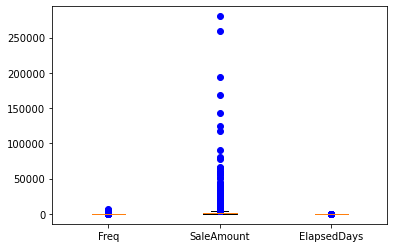

In [93]:
fig, ax = plt.subplots()
ax.boxplot( [customer_df['Freq'], customer_df['SaleAmount'], customer_df['ElapsedDays']], sym='bo')
# sym 아웃레이어를 파란색으로 표시해 주기 위함
#    --> 즉 아웃레이어가 많이 보인다는 것은 데이터가 그만큼 치우쳐져 있다는 의미

# label 달아 주기
plt.xticks([1,2,3], ['Freq', 'SaleAmount', 'ElapsedDays'])
plt.show() # show()를 해 주면 데이터 정보를 제외하고 시각화된 정보만 보여줌

# *위 데이터의 분포 고르게 조정 하려면?* - np.log1p()

In [95]:
# 각 컬럼에 대해 log 함수 추가
# - log 함수를 이용하여 값의 분포를 고르게 조정
# Standard Scale과 유사하며, 데이터를 보다 면밀히 보기 위함

import numpy as np
customer_df['Freq_log'] = np.log1p(customer_df['Freq'])
customer_df['SaleAmount_log'] = np.log1p(customer_df['SaleAmount'])
customer_df['ElapsedDays_log'] = np.log1p(customer_df['ElapsedDays'])
customer_df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays,Freq_log,SaleAmount_log,ElapsedDays_log
0,12346,1,77183.60,347,0.693147,11.253955,5.852202
1,12347,182,4310.00,24,5.209486,8.368925,3.218876
2,12348,31,1797.24,97,3.465736,7.494564,4.584967
3,12349,73,1757.55,40,4.304065,7.472245,3.713572
4,12350,17,334.40,332,2.890372,5.815324,5.808142


In [96]:
# 시각화를 위해 데이터 조정이 필요하면....np.log1p() 적용하여 시각화
# 학습을 위한 데이터 조정이 필요하면 StandardScale을 적용하여 시각화

# sklearn을 이용하여 pandas, numpy 등 각종 함수를 써서 데이터를 정제하는 것 보다,
# 당장 빠르게 시각화 하여 간편하게 확인하기에는 mp.log1p()가 유용

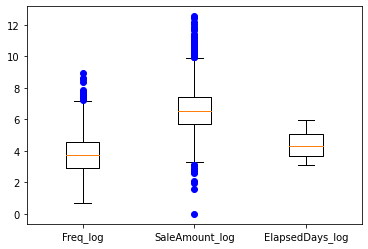

In [98]:
fig, ax = plt.subplots()
ax.boxplot( [customer_df['Freq_log'], customer_df['SaleAmount_log'], customer_df['ElapsedDays_log']], sym='bo')

plt.xticks([1,2,3], ['Freq_log', 'SaleAmount_log', 'ElapsedDays_log'])
plt.show()

# k-means (k-평균 군집화 모델)

In [99]:
# k-neighnors (k-이웃)과 유사

In [115]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [116]:
# 원본 데이터에서 뒤 세개의 컬럼(Freq, SaleAmount, ElapsedDays)만 추출하기

x_feature = customer_df.iloc[:,-3:].values

In [117]:
from sklearn.preprocessing import StandardScaler
x_feature_scaled = StandardScaler().fit_transform(x_feature)
x_feature_scaled

array([[-2.43663517,  3.69768662,  1.75515689],
       [ 1.18886461,  1.41181999, -1.41909282],
       [-0.21093425,  0.71904602,  0.22761365],
       ...,
       [-0.93404238, -1.10875557, -1.1993198 ],
       [ 2.29067291,  0.8215225 , -1.37181561],
       [ 0.42881405,  0.73649444, -0.26730562]])

# *log1p VS KMeans*
### log1p() 보다 더욱 디테일 함
### - log1p : log 이용
### - StandardScale : 정규분포를 이용하여 스케일링
### ** 두 가지를 혼용하여 사용하기도 함

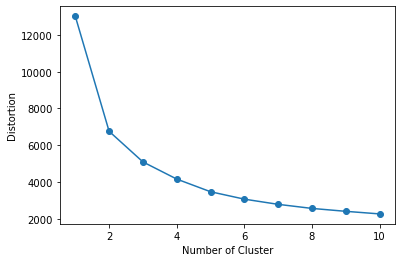

In [122]:
# k-평균 군집화 모델을 이용
# 엘보 방법을 이용하여 군집의 개수 선택

Distortion = [] # 왜곡 값 저장할 변수
for i in range(1, 11):
    # 모델 생성 
    KM_i = KMeans(n_clusters=i, random_state=0) # 고정값을 주지 않으면 매번 값이 달라지기 때문에 필수요소
    # scaled data 훈련시키기
    KM_i.fit(x_feature_scaled)
    # 훈련시킨 모델에 왜곡값 저장
    Distortion.append(KM_i.inertia_)
    
plt.plot(range(1,11), Distortion, marker='o') # x,y값
plt.xlabel("Number of Cluster")
plt.ylabel("Distortion")

plt.show()

# 초반에 급격하게 꺾인 부분과 완만해지기 시작하는 부분 사이의 값이 가장 적절함을 알 수 있음
# 해당 그래프에서는 3이 가장 적절한 것으로 볼 수 있음

In [123]:
# 클러스터의 개수 k를 3으로 설정해서 k-평균 모델을 다시 구축한 후,
# 모델에서 만든 클러스터 레이블 확인

In [133]:
kmeans = KMeans(n_clusters=3, random_state=0)

# 학습된 모델과 결과예측값(클러스터 레이블 생성하기)
y_predict = kmeans.fit_predict(x_feature_scaled) # 학습 + 예측 동시에

In [134]:
customer_df['clusterLabel'] = y_predict
customer_df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays,Freq_log,SaleAmount_log,ElapsedDays_log,clusterLabel
0,12346,1,77183.60,347,0.693147,11.253955,5.852202,2
1,12347,182,4310.00,24,5.209486,8.368925,3.218876,0
2,12348,31,1797.24,97,3.465736,7.494564,4.584967,1
3,12349,73,1757.55,40,4.304065,7.472245,3.713572,0
4,12350,17,334.40,332,2.890372,5.815324,5.808142,2


# 실루엣 분석 (응집력의 정도)

In [135]:
# 각 클러스터의 비중을 가로바 차트로 시각화
from matplotlib import cm

In [137]:
def silhouetteViz(n_cluster, X_features):
    kmeans = KMeans(n_clusters = n_cluster, random_state = 0)
    Y_labels = kmeans.fit_predict(X_features)

    silhouette_values = silhouette_samples(X_features, Y_labels, metric = 'euclidean')

    y_ax_lower, y_ax_upper = 0, 0
    y_ticks = []

    for c in range(n_cluster):
        c_silhouettes = silhouette_values[Y_labels == c]
        c_silhouettes.sort()
        y_ax_upper += len(c_silhouettes)
        color = cm.jet(float(c) / n_cluster)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouettes, height = 1.0, edgecolor = 'none', color = color)
        y_ticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouettes)

    silhouette_avg = np.mean(silhouette_values)
    plt.axvline(silhouette_avg, color = 'red', linestyle = '--')
    plt.title('Number of Cluster : '+ str(n_cluster) + '\n' + 'Silhouette Score : '+ str(round(silhouette_avg,3)))
    plt.yticks(y_ticks, range(n_cluster))
    plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.tight_layout()
    plt.show()

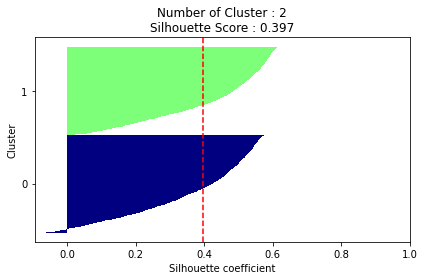

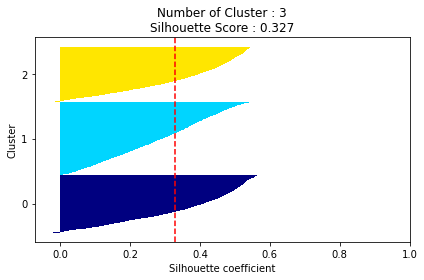

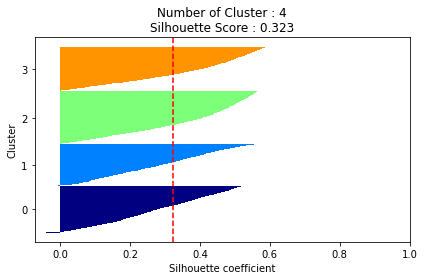

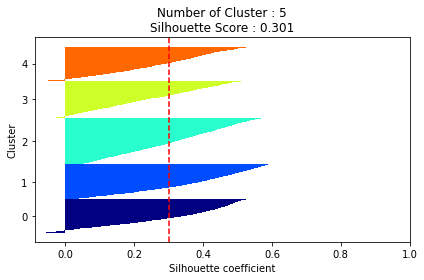

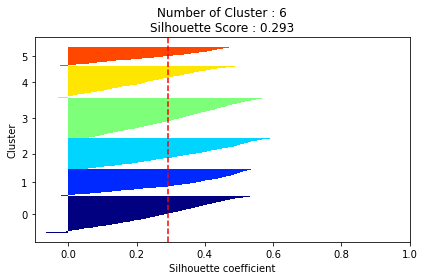

In [144]:
# 실루엣은 1에 가까울수록 적정 군집

# 1개는 Error -->  군집을 하나로 본다는 것이므로 어차피 의미가 없음
silhouetteViz(2, x_feature_scaled) # 0.397
silhouetteViz(3, x_feature_scaled) # 0.327
silhouetteViz(4, x_feature_scaled) # 0.323
silhouetteViz(5, x_feature_scaled) # 0.301
silhouetteViz(6, x_feature_scaled) # 0.293

In [141]:
# 클러스터 분포
def clusterScatter(n_cluster, X_features):
    c_colors = []
    kmeans = KMeans(n_clusters = n_cluster, random_state = 0)
    Y_labels = kmeans.fit_predict(X_features)

    for i in range(n_cluster):
        c_color = cm.jet(float(i) / n_cluster) #클러스터의 색상 설정
        c_colors.append(c_color)
        #클러스터의 데이터 분포를 동그라미로 시각화
        plt.scatter(X_features[Y_labels == i,0], X_features[Y_labels == i,1], marker = 'o', color =  c_color, edgecolor = 'black', s = 50, label = 'cluster '+ str(i))

    #각 클러스터의 중심점을 삼각형으로 표시
    for i in range(n_cluster):
        plt.scatter(kmeans.cluster_centers_[i,0], kmeans.cluster_centers_[i,1], marker = '^', color = c_colors[i], edgecolor = 'w', s = 200)
        plt.legend()
        plt.grid()
        plt.tight_layout()
        plt.show()

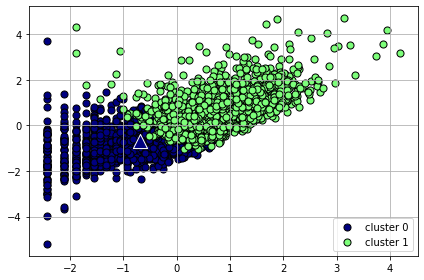

No handles with labels found to put in legend.


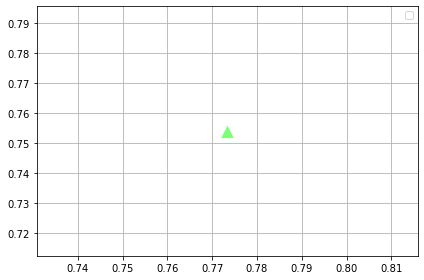

In [145]:
clusterScatter(2, x_feature_scaled)

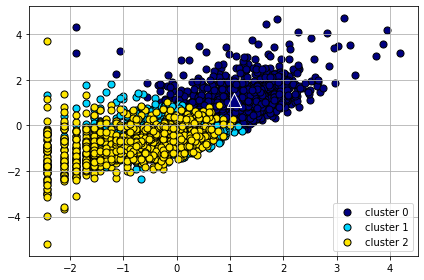

No handles with labels found to put in legend.


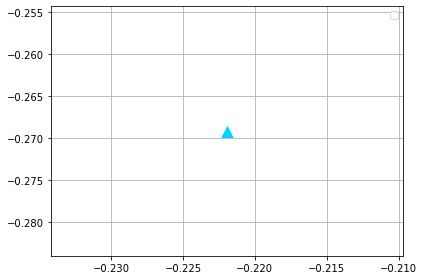

No handles with labels found to put in legend.


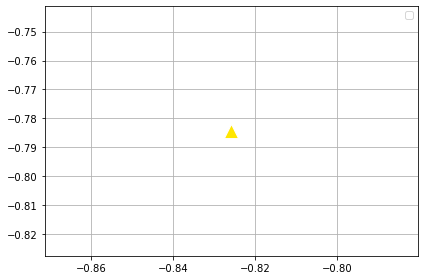

In [146]:
clusterScatter(3, x_feature_scaled)

## 엘보 & 실루엣 모두 2일 때 가장 최적의 군집을 이룬다는 것을 알 수 있음

In [147]:
# 클러스터를 2개로 재조정
best_cluster = 2
kmeans = KMeans(n_clusters=best_cluster, random_state=0)
y_predict = kmeans.fit_predict(x_feature_scaled)

In [150]:
customer_df['clusterLabel'] = y_predict
customer_df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays,Freq_log,SaleAmount_log,ElapsedDays_log,clusterLabel
0,12346,1,77183.60,347,0.693147,11.253955,5.852202,0
1,12347,182,4310.00,24,5.209486,8.368925,3.218876,1
2,12348,31,1797.24,97,3.465736,7.494564,4.584967,1
3,12349,73,1757.55,40,4.304065,7.472245,3.713572,1
4,12350,17,334.40,332,2.890372,5.815324,5.808142,0


In [151]:
# DataFrame을 파일로 저장
customer_df.to_csv(r'C:\Users\pc\_MachineLearning\20220311\customer_cluster.csv')

In [152]:
# 소비자 군집 완성
customer_df.groupby('clusterLabel')['CustomerID'].count()

clusterLabel
0    2282
1    2057
Name: CustomerID, dtype: int64

# < 차주 계획 >
### - Cluster별로 고객의 구매빈도, 마지막 구매일 이후 얼마나 경과...등 각종 통계 구하기
### - 각 클러스터의 특징 파악 후 마케팅에 활용하기
### !! 주의 !!
### *위 예시에서는 2개 군집이 최적의 값이었으나...*
### *마케팅에 활용하려면 고객을 보다 더 세분화 하여 분석하는 것이 좋을 것*